In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
import statistics 

In [3]:
module_roi = "../../05_30_2020/roi_measures_Module_ALL.csv"
line_roi = "../../05_30_2020/roi_measures_Line_ALL.csv"

df_module = pd.read_csv(module_roi)
df_line = pd.read_csv(line_roi)

df = df_module.join(df_line.set_index(c.PROJECT), on=c.PROJECT, rsuffix='_LINE')
roi_df = df[["Annualized_ROI", "Annualized_ROI_LINE"]]
roi_df.head()

,Annualized_ROI,Annualized_ROI_LINE
0,1.236,-0.63
1,2.022,7.90
2,0.124,-0.51
3,-0.624,-0.52
4,0.149,0.17


In [4]:
roi_df["ROI_MEAN"] = roi_df.mean(axis=1)
roi_df.head()

,Annualized_ROI,Annualized_ROI_LINE,ROI_MEAN
0,1.236,-0.63,0.3030
1,2.022,7.90,4.9610
2,0.124,-0.51,-0.1930
3,-0.624,-0.52,-0.5720
4,0.149,0.17,0.1595


In [5]:
df["ROI_MEAN"] = roi_df["ROI_MEAN"]

In [6]:
PROJECT_LIST = [
  "angular"
  ,"node"
  ,"neutron"
  ,"vue"
  ,"home-assistant"
  ,"tensorflow"
  ,"moby"
  ,"gitlabhq"
  ,"orleans"
  ,"roslyn"
  ,"ansible"
  ,"cli"
  ,"nova"
  ,"angular.js"
  ,"lock"
  ,"kubernetes"
  ,"mesos"
  ,"Odin"
  ,"nixpkgs"
  ,"react"
  ,"brew"
  ,"cinder"
  ,"elasticsearch"
  ,"linux"
  ,"cf-deployment"
  ,"office-js"
]


popular_projects = df[~df[c.PROJECT].isin(PROJECT_LIST)]
len(popular_projects)

38

In [7]:
positive_roi = popular_projects[popular_projects["ROI_MEAN"] >= 0].sort_values(by="Project")
print(len(positive_roi))

23


In [8]:
percent_positive = len(positive_roi) /  len(popular_projects)
percent_positive

0.6052631578947368

In [9]:
print("Annualized ROI Mean: {0}".format(popular_projects["ROI_MEAN"].mean()))
print("Annualized ROI Min: {0}".format(popular_projects["ROI_MEAN"].min()))
print("Annualized ROI Max: {0}".format(popular_projects["ROI_MEAN"].max()))

Annualized ROI Mean: 0.5693815789473685
Annualized ROI Min: -1.0
Annualized ROI Max: 6.9625


Text(0, 0.5, 'Count')

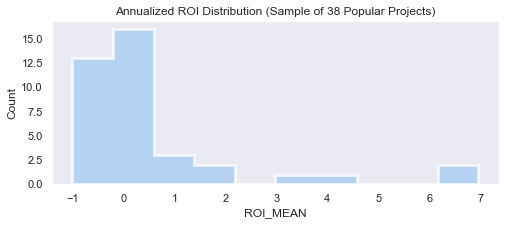

In [10]:
plt.figure(figsize=(8,3))
plt.tight_layout()

sb.set(style="dark", palette="pastel")
ax = sb.distplot(popular_projects["ROI_MEAN"], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3}, bins=10)
ax.set_title('Annualized ROI Distribution (Sample of 38 Popular Projects)')
plt.ylabel("Count")

In [11]:
negative_roi = popular_projects[popular_projects["ROI_MEAN"] < 0].sort_values(by="Project")
negative_roi.head(15)

,Project,Model,Amount_Invested,Amount_Returned,Investment_Gain,ROI,Annualized_ROI,Model_LINE,Amount_Invested_LINE,Amount_Returned_LINE,Investment_Gain_LINE,ROI_LINE,Annualized_ROI_LINE,ROI_MEAN
61,AutoMapper,Module,9597.28,10259.44,662.16,0.069,0.022,Line,1053166.22,126249.00,-926917.22,-0.88,-0.51,-0.2440
44,browser-sync,Module,3300.11,180.00,-3120.11,-0.945,-0.620,Line,1454621.05,2740.00,-1451881.05,-1.00,-0.87,-0.7450
58,core-js,Module,13235.32,440.00,-12795.32,-0.967,-0.679,Line,425728.60,6320.00,-419408.60,-0.99,-0.75,-0.7145
24,d3,Module,1443.32,294.50,-1148.82,-0.796,-0.411,Line,70134.66,912.00,-69222.66,-0.99,-0.77,-0.5905
59,mathjs,Module,3620.01,52.56,-3567.45,-0.985,-0.753,Line,57000.17,3251.44,-53748.73,-0.94,-0.62,-0.6865
40,medium-editor,Module,3542.55,914.25,-2628.30,-0.742,-0.363,Line,73182.12,7386.06,-65796.06,-0.90,-0.53,-0.4465
55,ng-file-upload,Module,1077.00,0.00,-1077.00,-1.000,-1.000,Line,5094.25,0.00,-5094.25,-1.00,-1.00,-1.0000
51,nightwatch,Module,2897.54,646.00,-2251.54,-0.777,-0.394,Line,109928.01,39785.69,-70142.32,-0.64,-0.29,-0.3420
42,npm,Module,63733.25,49701.34,-14031.91,-0.220,-0.079,Line,8212060.17,2685113.40,-5526946.77,-0.67,-0.31,-0.1945
38,pandoc,Module,4381.42,306.95,-4074.47,-0.930,-0.588,Line,149416.56,4928.05,-144488.51,-0.97,-0.68,-0.6340


In [12]:
negative_roi["ROI_MEAN"].mean()

-0.5167666666666666